In [1]:
from ga_regression import *
from matplotlib import pyplot as plt
from functools import partial
import PIL
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from pvutils import iter_subplots
from pyvista import PolyData
import pyvista as pv
from scipy.stats import pearsonr

C:\Users\dg\.conda\envs\diffnet4\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
file = Path(r"D:\resynth\run_48_49\run00048_simp_vis_color\2025-07-21-09-26-35\opts_and_metadata.pt")  # n_blocks
readers = Readers.from_file(file)

In [3]:
run_idx = 0
r = readers[run_idx]

ch_idx = 0
ch = r.metadata.channel[ch_idx]
sd = r.scatter_data

In [4]:
r.metadata.channel

(14, 17, 29, 23, 2, 0, 13, 31, 3, 26, 28, 9, 20, 11, 18)

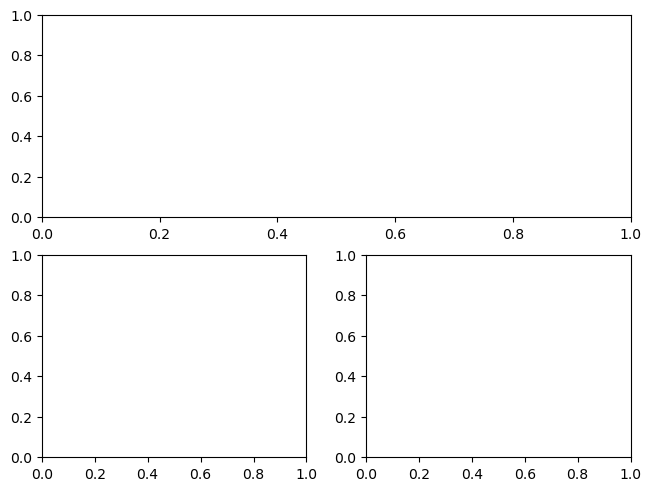

In [27]:
fig, axs = plt.subplot_mosaic([['loss', 'loss'],['scatter_train', 'scatter_test']], constrained_layout=True)

r.plot_loss(ax=axs['loss'])
r.scatter_plot(channel=None, axs=[axs['scatter_train'], axs['scatter_test']])

In [7]:
obs, preds = sd.loc(channel=ch, scene_ids=None)
priority_idx = (obs + preds).argsort()[::-1]
n_stim = 5

In [8]:
r.metadata.opts.augment = None
expt = self = r.experiment()
dataset, df, responses = r.metadata.load_dataset(weights=None, augment=None)

In [9]:
mesh_data = dataset[0]

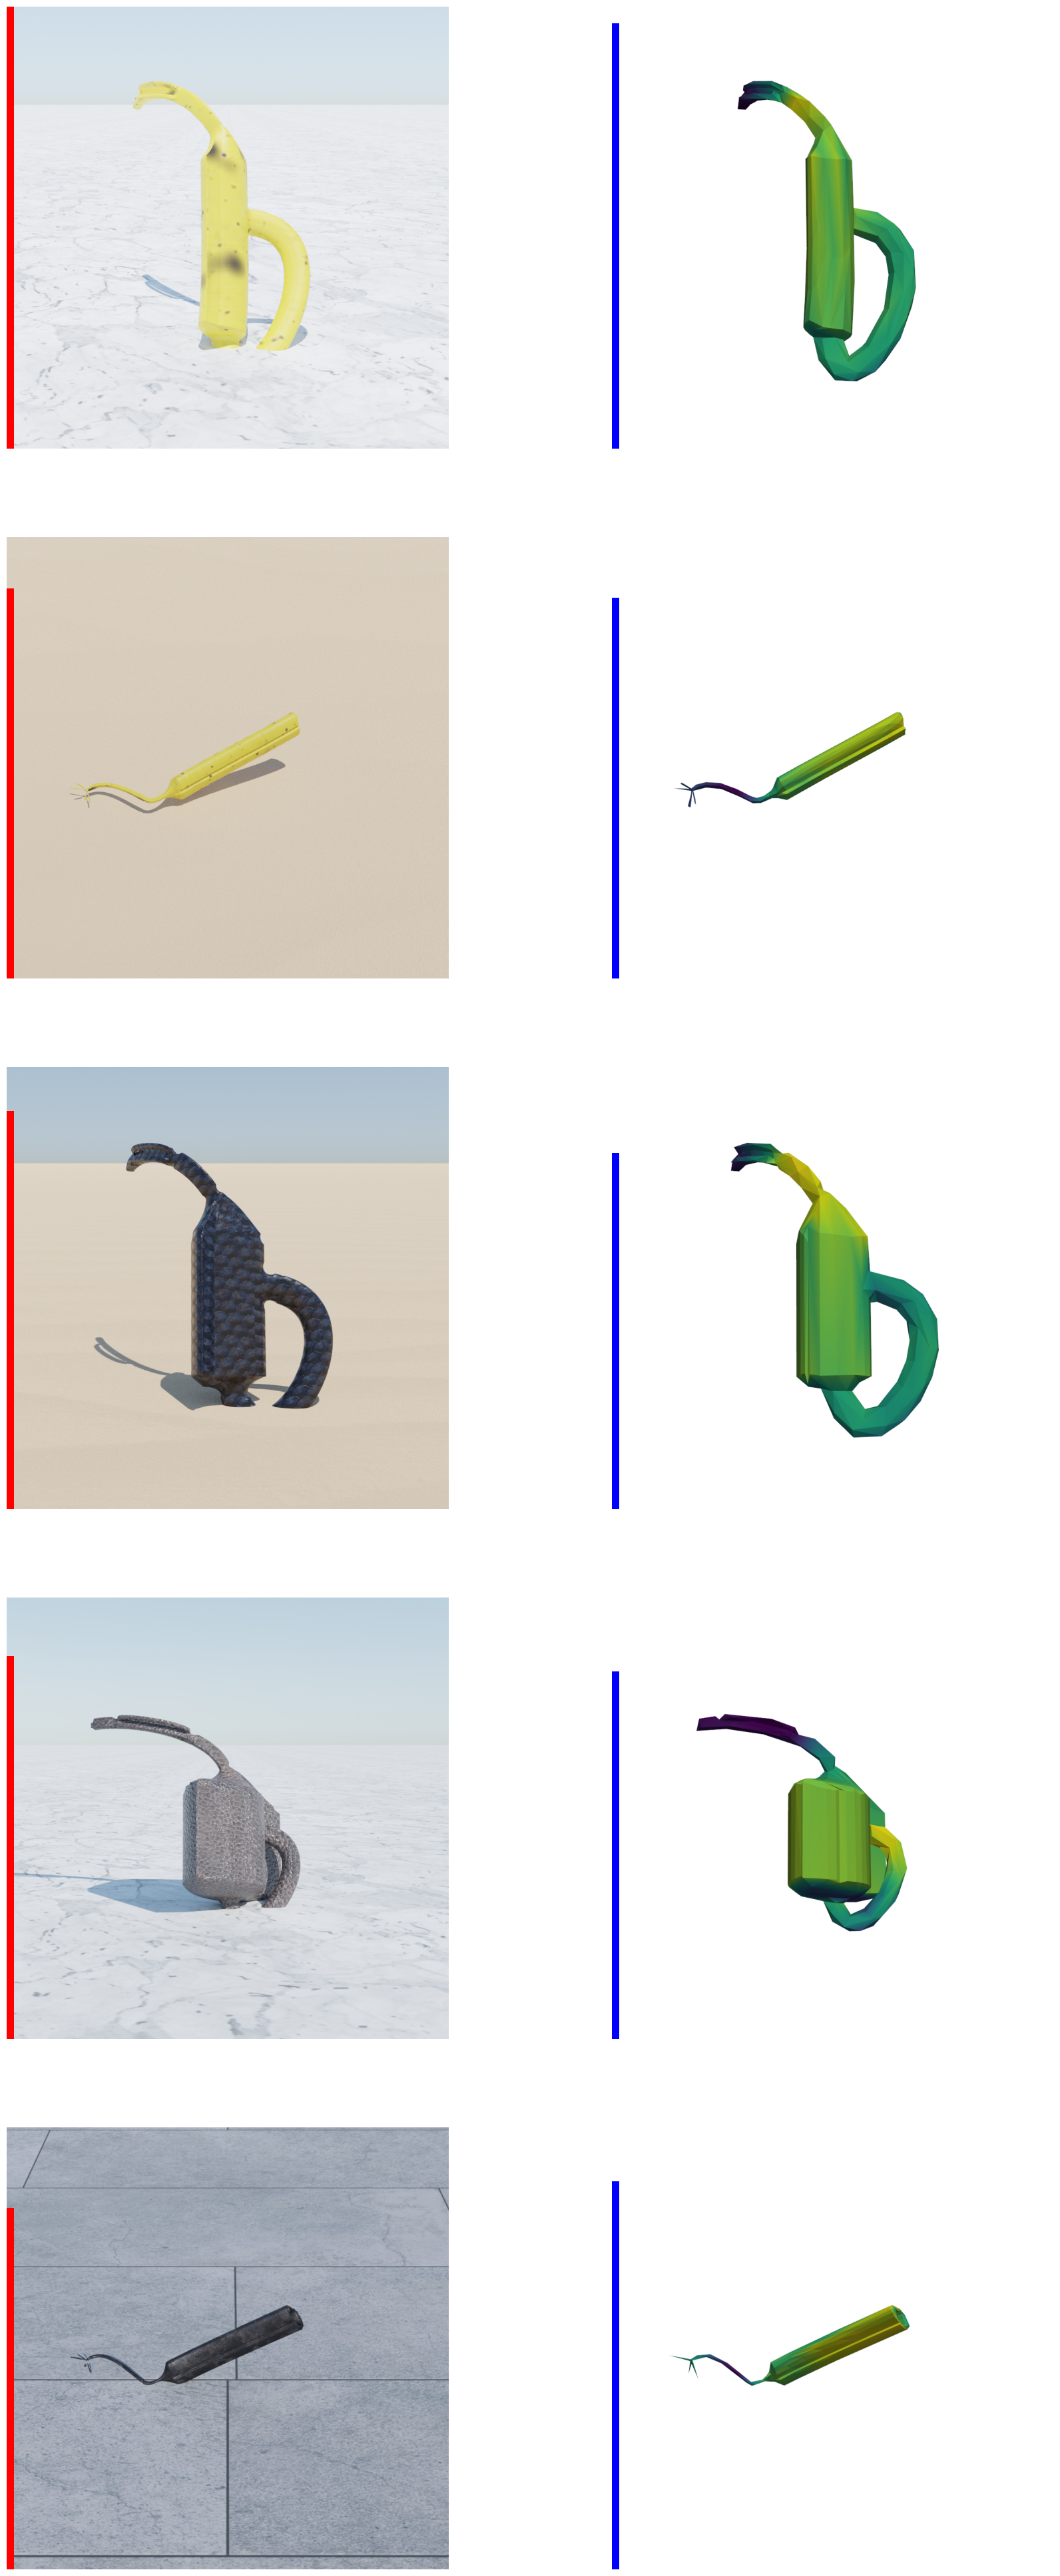

In [11]:
def plot_stim(stim_idx, axs):
    p, mesh, render_img, mesh_img = expt.load_mesh_img(dataset=dataset, stim_idx=stim_idx, ch_idx=ch_idx, upsample=False, background_color=None)
    r_obs_pred = obs[stim_idx], preds[stim_idx]
    r_obs_pred = np.clip(r_obs_pred, 0, 1) * 1024
   
    for ax, img, r, bar_color in zip(axs, (render_img, mesh_img), r_obs_pred, ('red', 'blue')):
        ax.imshow(img)
        ax.axis('off')
        rect = mpl.patches.Rectangle((0, 1024 - r), 16, r, facecolor=bar_color)
        ax.add_patch(rect)

fig_w = 10
fig, axs = plt.subplots(n_stim, 2, figsize=(fig_w * 2.15, n_stim * fig_w), squeeze=False)

for stim_idx, axs_i in zip(priority_idx, axs):
    plot_stim(stim_idx, axs_i)

In [15]:
import re

In [19]:
r = readers[0]
f = r.metadata.opts.data_file

# run_id = re.

In [22]:
run_id = int(re.match('run(\d+)', f.name)[1])


48